# Correspondence between DDM and BOLD dynamics

In [1]:
import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from statsmodels.stats.weightstats import DescrStatsW

sys.path.append('..')
from src import utils
utils.setup_matplotlib()

In [2]:
utils.download_dataset("data/outputs/fmri")

with open(f"{utils.ORIGIN}/data/outputs/fmri/results_correspondence_score.pickle", 'rb') as f:
    scores = pickle.load(f)
with open(f"{utils.ORIGIN}/data/outputs/fmri/permutation_correspondence_score.pickle", 'rb') as f:
    scores_perm = pickle.load(f)

downloading data/outputs/fmri...
data/outputs/fmri already exists. Skipping download...


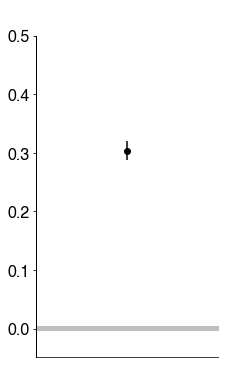

In [3]:
mm = np.mean(scores['full'])
ss = np.std(scores['full'])/np.sqrt(50)
scores_perm_m = np.mean(np.mean(scores_perm[0],axis=0))
scores_perm_s = np.std(np.mean(scores_perm[0],axis=0))

plt.figure()
utils.set_size([2.6,4])
ax = plt.gca()

plt.vlines(x=0, ymin=mm-ss, ymax=mm+ss, color='k')
plt.scatter([0], [mm], color='k')
plt.axhspan(scores_perm_m-scores_perm_s,
            scores_perm_m+scores_perm_s, color='gray', alpha=0.5, linewidth=0)

plt.xlim([-1,1])
plt.ylim([-0.05,0.55])

utils.draw_publish_axis(ax, xrange=(-1,1), yrange=(-0.1,0.5), xticks=[], yticks=[0,0.1,0.2,0.3,0.4,0.5])
plt.savefig(f'{utils.DIR_FIGURE}/sfig6a_left.pdf',bbox_inches='tight')
plt.show()

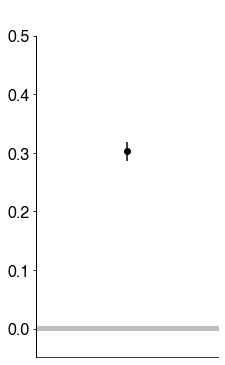

In [4]:
mm = np.mean(scores['reduced'])
ss = np.std(scores['reduced'])/np.sqrt(50)
scores_perm_m = np.mean(np.mean(scores_perm[1],axis=0))
scores_perm_s = np.std(np.mean(scores_perm[1],axis=0))


plt.figure()
utils.set_size([2.6,4])
ax = plt.gca()
plt.vlines(x=0, ymin=mm-ss, ymax=mm+ss, color='k')
plt.scatter([0], [mm], color='k')
plt.axhspan(scores_perm_m-scores_perm_s,
            scores_perm_m+scores_perm_s, color='gray', alpha=0.5, linewidth=0)

plt.xlim([-1,1])
plt.ylim([-0.05,0.55])

utils.draw_publish_axis(ax, xrange=(-1,1), yrange=(-0.1,0.5), xticks=[], yticks=[0,0.1,0.2,0.3,0.4,0.5])
plt.savefig(f'{utils.DIR_FIGURE}/sfig6a_right.pdf',bbox_inches='tight')
plt.show()

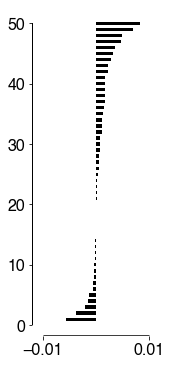

In [5]:
difference = scores['full'] - scores['reduced']
argsort = np.argsort(difference)

plt.figure()
utils.set_size([2,4])
ax = plt.gca()

plt.barh(np.arange(1,51), (difference)[argsort], align='center', color='k', height=0.55)
plt.xlim([-0.012,0.012])

utils.draw_publish_axis(ax, xrange=(-0.01,0.01), yrange=(0,50), xticks=[-0.01,0.01], yticks=[0,10,20,30,40,50])
plt.savefig(f'{utils.DIR_FIGURE}/sfig6b.pdf',bbox_inches='tight')
plt.show()

In [6]:
ttest  = DescrStatsW(difference)
wilcox = wilcoxon(difference)
print('Paired samples t-test')
print('t(49)=',  ttest.ttest_mean()[0], 'p=', ttest.ttest_mean()[1])
print('95% CI=', ttest.tconfint_mean())
print('Wilcoxon signed-rank test (without continuity correction)')
print('V=', wilcox[0], 'p=', wilcox[1])

Paired samples t-test
t(49)= 2.8456229134522686 p= 0.006453798928520243
95% CI= (0.00026921911437185195, 0.0015634421078829577)
Wilcoxon signed-rank test (without continuity correction)
V= 304.0 p= 0.0012847329834403912
